<a href="https://colab.research.google.com/github/Krahjotdaan/MachineLearning/blob/main/LinearRegression_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt

# Линейная регрессия

## Аналитическое решение для парной регрессии (немного теории со слайдов)

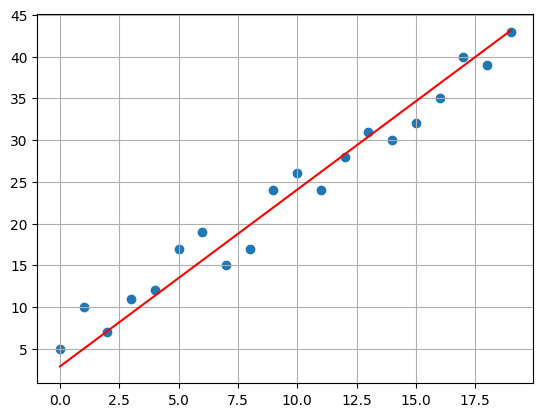

In [ ]:
x = np.arange(20)
y = 2*x + 4
y = y + np.random.randint(-3, 5 ,20)

plt.scatter(x, y)
plt.plot(x, 2.12*x + 2.86, 'r')
plt.grid()

### Наша задача:
$$a(x) = w_0 + w_1 x$$

$$Q(w,x) = \frac{1}{l}\sum^l_{i=1}(a(x_i) - y_i)^2 \Rightarrow  \min_{w}$$

####  Подставим сюда явный вид для  $a(x) $

Получим такое выражение:

$Q(w,x) = \frac{1}{l}\sum^l_{i=1}(w_0 + w_1x_i - y_i)^2 \Rightarrow  \min_{w}$

Чтобы эта функция достигла своего минимума, нужно чтобы частные производные от  $w_0$  и  $w_1 $ были равны нулю

$$\left(\frac{\partial Q}{\partial w_0},\frac{\partial Q}{\partial w_1}\right) = 0$$

#### Берем эти производные...

$ \frac{\partial Q}{\partial w_0} = \frac{2}{l}\sum^l_{i=1}( w_0 + w_1x_i  - y_i) = 0 $




$ w_0\frac{1}{l}\sum 1  + w_1\frac{1}{l}\sum x_i - \frac{1}{l}\sum y_i = 0$


$ w_0  + w_1 \overline{x} - \overline{y}  = 0$  , где $\overline{y} = \frac{1}{l}\sum^l_{i=1}y_i$

Получаем выражения для весовых коэфициентов:

$$w_0 = \overline{y} - w_1 \overline{x}$$

####  Теперь берем производную по $w_1$:

$ \frac{\partial Q}{\partial w_1} = \frac{2}{l}\sum^l_{i=1}(w_0 + w_1 x_i - y_i) x_i = 0$



$0 = w_0\frac{1}{l}\sum^l_{i=1}x_i + w_1\frac{1}{l}\sum^l_{i=1}x_i^2 - \frac{1}{l}\sum^l_{i=1}x_i y_i =$
$ w_0 \overline{x} + w_1\overline{x^2} - \overline{xy}$

Подставим выражение для $w_0$

$(\overline{y} - w_1\overline{x})\overline{x} + w_1\overline{x^2} - \overline{xy} = 0$


$$ w_1 = \frac{\overline{(x y)}-\overline{x} \overline{y}}{\overline{(x^2)}-( \overline{x} )^2}  $$

## Практика 1
Напишите функцию восстановления параметров линейной регрессии для одномерного случая

$$a(x) = w_0 + w_1 x$$

$$Q(w,x) = \frac{1}{l}\sum^l_{i=1}(a(x_i) - y_i)^2 \Rightarrow  \min_{w}$$


, используя аналитическое решение

$$ w_1 = \frac{\overline{(x y)}-\overline{x} \overline{y}}{\overline{(x^2)}-( \overline{x} )^2}  $$

$$ w_0 = \overline{y}-w_1\overline{x}  $$

,где $ \overline{x} = \frac{1}{l}(x_1 + ... + x_l) = \frac{1}{l}\sum^l_{i=1} x_i$

In [ ]:
def find_w0_w1(X, y):
  w1 = ((X * y).mean() - X.mean() * y.mean()) / ((X ** 2).mean() - X.mean() ** 2)
  w0 = y.mean() - w1 * X.mean()
  return w0, w1

### Проверьте работоспособность функции на трех точках:

In [ ]:
plt.scatter(np.array([1,2,3]), np.array([3, 5, 7]))
plt.grid()

In [ ]:
find_w0_w1(np.array([1,2,3]), np.array([3, 5, 7]))

### Восстановите прямую для набора данных:

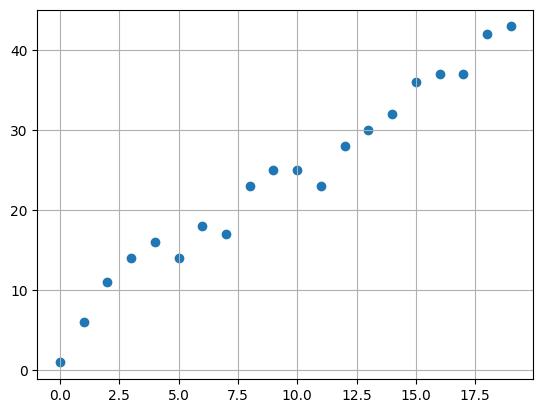

In [ ]:
x = np.arange(20)
y = 2*x + 4
y = y + np.random.randint(-3, 5, 20)

plt.scatter(x, y)
plt.grid()

In [ ]:
w0, w1 = find_w0_w1(x, y)
w0, w1

(5.185714285714276, 1.969924812030076)

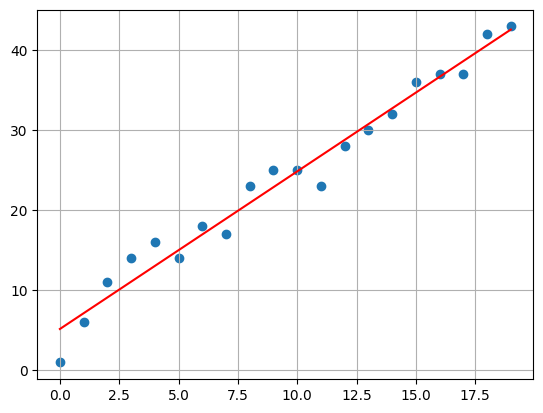

In [ ]:
plt.scatter(x, y)
plt.plot(x, w1*x + w0, 'r')
plt.grid()

## Практика 2
Напишите функцию расчета среднеквадратичной ошибки (mse)

$$ mse = Q(w,x) = \frac{1}{l}\sum^l_{i=1}(a(x_i) - y_i)^2 $$

и функцию расчета коэффициент детерминации $R^2$

$$R^2 = 1 - \frac{\sum^l_{i=1}(y_i - \hat{y_i})^2}{\sum^l_{i=1}(y_i - \overline{y})^2}$$
, где $\overline{y} = \frac{1}{l}\sum^l_{i=1}y_i$

и $\hat{y_i}$ - прогноз для i-го объекта

In [ ]:
def calc_mse(y, y_pred):
  mse = np.mean((y_pred - y) ** 2)
  return mse

In [ ]:
def calc_r_squared(y, y_pred):
  return 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

In [ ]:
# проверка - должно получиться 1.0
calc_r_squared(np.array([1,2,3,4,5,6]), np.array([1,2,3,4,5,6]))

1.0

## Практика 3
- Загрузите данные из файла **yandex_flats_2023.csv** (целевой признак - price)

- Убедитесь в том, что признак square подходит для построения линейной регрессии (визуализируйте)

- Восстановите параметры линейной модели и визуализируйте решение

- Постройте вектор прогнозов по признаку square

- Посчитайте среднеквадратичную ошибку

- Посчитайте коэфициент детерминации

### Признаки датасета
 |признак|описание|
 |-------|--------|
 |n|порядковый номер|
 |time|время до метро|
 |tyme_type|пешком или на машине|
 |rooms|тип квартиры|
 |floor|этаж|
 |max_floor|количество этажей в доме|
 |price|цена аренды в месяц|



In [ ]:
df = pd.read_csv('yandex_flats_2023.csv', index_col = 0)
df

,time,time_type,square,rooms,floor,max_floor,price
0,16,bus,27.0,квартира-студия,8,14,39000
1,24,bus,34.0,квартира-студия,10,16,31000
2,15,ped,20.0,квартира-студия,21,32,44000
3,9,bus,16.0,квартира-студия,2,6,38000
4,3,ped,20.0,апартаменты-студия,12,16,39000
...,...,...,...,...,...,...,...
2814,10,ped,340.0,4-комнатная,2,8,1600
2815,13,ped,402.0,5-комнатная,6,18,500000
2816,9,ped,225.0,4-комнатная,17,57,490000
2817,19,bus,63.0,4-комнатная,6,9,47000


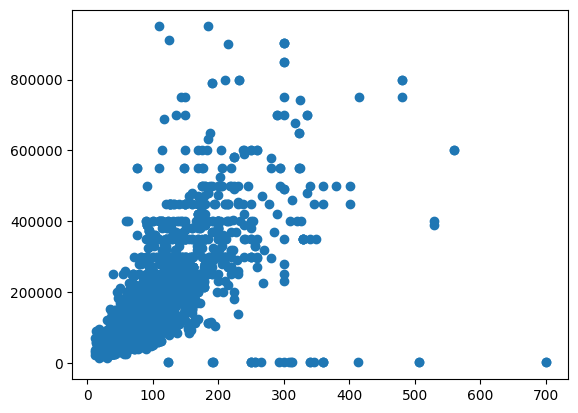

In [ ]:
plt.scatter(df['square'], df['price']);

In [ ]:
df1 = df[df['price'] > 5000]

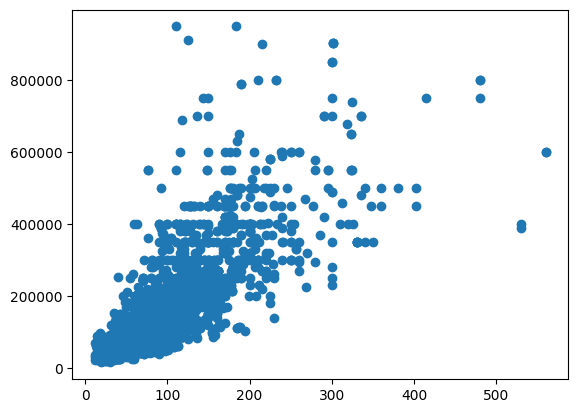

In [ ]:
plt.scatter(df1['square'], df1['price']);

## Практика 4
Выполните задания Практики 3 с признаком time:
- восстановите параметры линейной модели
- постройте вектор прогнозов цены
- посчитайте mse и $R^2$
- визуализируйте объекты и восстановленную прямую

Целевым признаком остается price

In [ ]:
w0, w1 = find_w0_w1(df1['square'], df1['price'])
w0, w1

(-5434.108833105303, 1757.1346089384956)

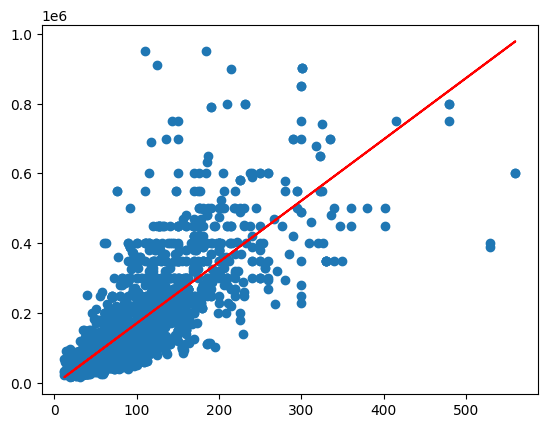

In [ ]:
plt.scatter(df1['square'], df1['price'])
plt.plot(df1['square'], w0 + w1 * df1['square'], c = 'red');

In [ ]:
y_pred = w0 + w1 * df1['square']
y = df1['price']

In [ ]:
calc_mse(y, y_pred), calc_mse(y, y_pred) ** 0.5, calc_r_squared(y, y_pred)

(6914331664.014983, 83152.4603605629, 0.6667222373857243)

In [ ]:
df = pd.read_csv('yandex_flats_2023.csv', index_col = 0)
df1 = df[df['price'] > 5000]
df1

,time,time_type,square,rooms,floor,max_floor,price
0,16,bus,27.0,квартира-студия,8,14,39000
1,24,bus,34.0,квартира-студия,10,16,31000
2,15,ped,20.0,квартира-студия,21,32,44000
3,9,bus,16.0,квартира-студия,2,6,38000
4,3,ped,20.0,апартаменты-студия,12,16,39000
...,...,...,...,...,...,...,...
2813,16,ped,180.0,4-комнатная,13,22,280000
2815,13,ped,402.0,5-комнатная,6,18,500000
2816,9,ped,225.0,4-комнатная,17,57,490000
2817,19,bus,63.0,4-комнатная,6,9,47000


In [ ]:
df['rooms'].value_counts()

1-комнатная           542
2-комнатная           529
3-комнатная           516
квартира-студия       416
4-комнатная           355
апартаменты-студия    127
5-комнатная           115
3-комнатные            57
6-комнатная            56
2-комнатные            45
1-комнатные            29
4-комнатные            14
7-комнатная             8
8-комнатная             4
6-комнатные             3
5-комнатные             2
7-комнатные             1
Name: rooms, dtype: int64

In [ ]:
r  = {
    '1-комнатная': 1,
    '2-комнатная': 2,
    '3-комнатная': 3,
    '4-комнатная': 4,
    '5-комнатная': 5,
    '3-комнатные': 3,
    '6-комнатная': 6,
    '2-комнатные': 2,
    '1-комнатные': 1,
    '4-комнатные': 4,
    '7-комнатная': 7,
    '8-комнатная': 8,
    '6-комнатные': 6,
    '7-комнатные': 7,
    'квартира-студия': 0.8,
    'апартаменты-студия': 0.8
}

r_1 = {
    'ped': 0,
    'bus': 1
}

df1['rooms'] = df1['rooms'].replace(r)
df1['time_type'] = df1['time_type'].replace(r_1)
df1['one'] = 1

df1

<ipython-input-23-b1932e830cb6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rooms'] = df1['rooms'].replace(r)
<ipython-input-23-b1932e830cb6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time_type'] = df1['time_type'].replace(r_1)
<ipython-input-23-b1932e830cb6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,time,time_type,square,rooms,floor,max_floor,price,one
0,16,1,27.0,0.8,8,14,39000,1
1,24,1,34.0,0.8,10,16,31000,1
2,15,0,20.0,0.8,21,32,44000,1
3,9,1,16.0,0.8,2,6,38000,1
4,3,0,20.0,0.8,12,16,39000,1
...,...,...,...,...,...,...,...,...
2813,16,0,180.0,4.0,13,22,280000,1
2815,13,0,402.0,5.0,6,18,500000,1
2816,9,0,225.0,4.0,17,57,490000,1
2817,19,1,63.0,4.0,6,9,47000,1


In [ ]:
X = df1.drop(columns = ['price'])
y = df1['price']

In [ ]:
w = linalg.lstsq(X, y, rcond = None)[0]
w

array([-2.24157657e+03, -1.84233136e+04,  1.91379493e+03, -1.32679427e+04,
        9.76373380e+02,  6.24921497e-01,  3.19081336e+04])

In [ ]:
y_pred = X.dot(w)

In [ ]:
calc_mse(y, y_pred), calc_mse(y, y_pred) ** 0.5, calc_r_squared(y, y_pred)

(6432409678.602156, 80202.30469632501, 0.6899513633313189)

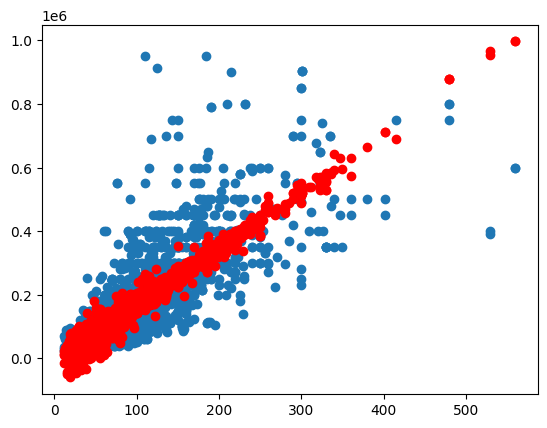

In [ ]:
plt.scatter(df1['square'], df1['price'])
plt.scatter(df1['square'], y_pred, color='red');

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df1 = df1.drop(columns = ['one'])

In [ ]:
X = df1.drop(columns = ['price'])
y = df1['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred) ** 0.5, r2_score(y_test, y_pred)

(6626971310.651099, 81406.211744873, 0.6626714530586844)